In [66]:
# load packages
library(ggplot2, quietly = T)
library(RColorBrewer, quietly = T)

We will pass our datafarames directly into our plotting functions, rather than passing vectors associated with each variable we want to plot.

In [67]:
# load the data
library(datasets, quietly = T)
data(iris)
df = iris
df[['Species']] = as.character(df$Species)
head(df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


# Scatter Plot & Syntax

Instead of exploring all the different types of plots and their arguments, we will focus on the simple example of scatter plots to understand syntax and how visualizations can be customized/manipulated from the default.

This notebook is just a small subset of all the customization options available for visualization meant to give you a sense of how using code to generate figures works. Additionally, many of the figure modifications shown here can be done in multiple different ways.


Let's plot the two **continuous** variables sepal length vs sepal width, and color it by the **categorical/discrete** variable species:

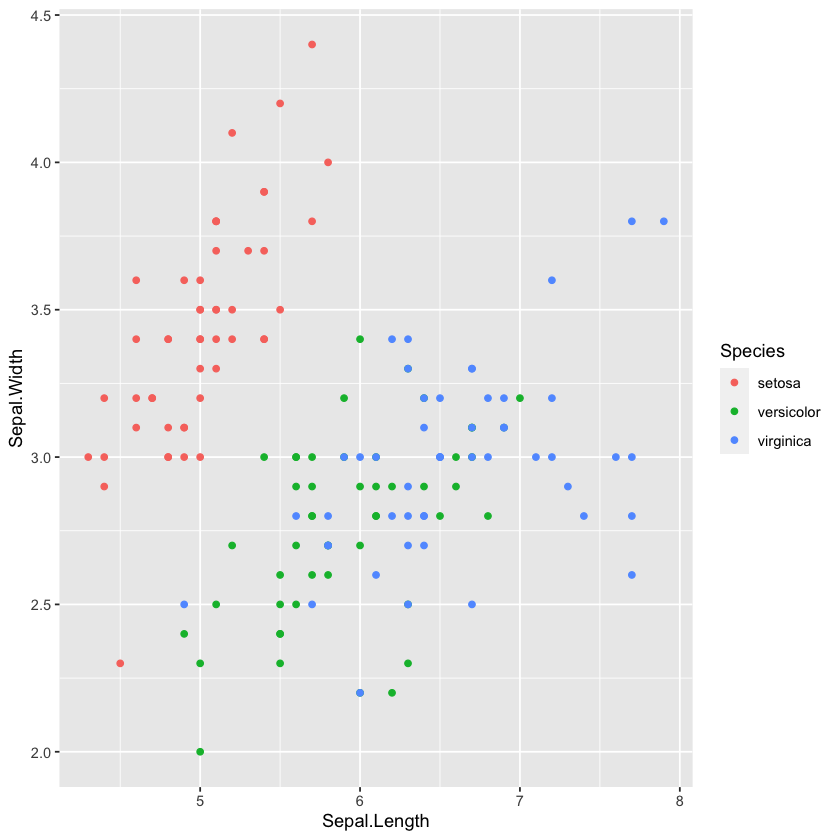

In [68]:
g <- ggplot(data = df, mapping = aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + # set up the variables to plot
    geom_point()
g

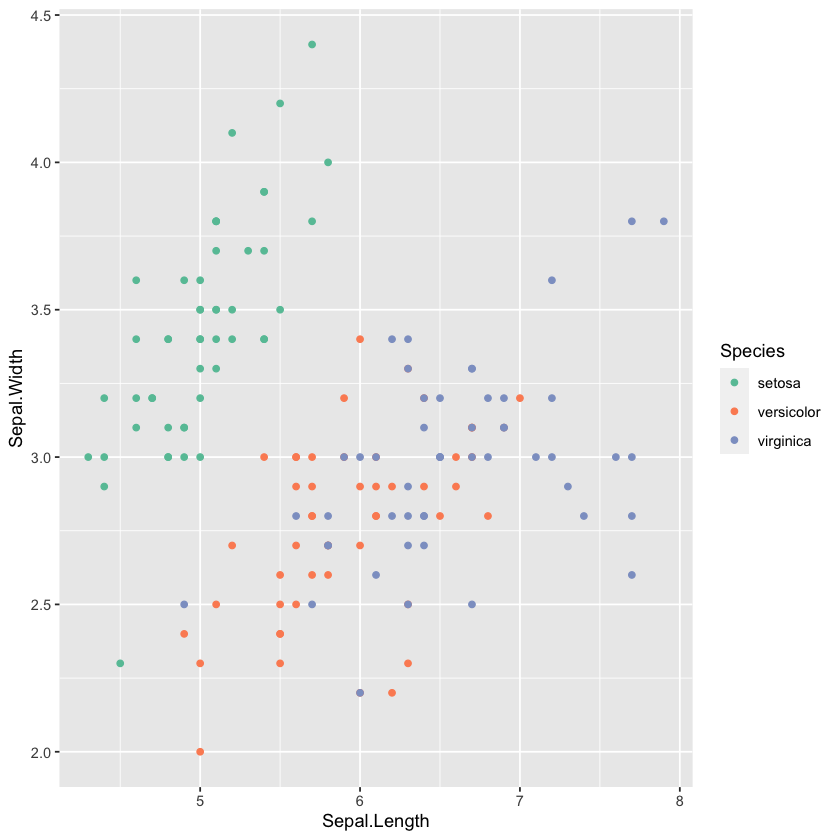

In [69]:
g.main <- ggplot(data = df, mapping = aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + # set up the variables to plot
    geom_point() +
    scale_color_brewer(palette = 'Set2')

g.main

Note, we can also manually specify the colors that we want. Color codes for R can be found here: https://www.nceas.ucsb.edu/sites/default/files/2020-04/colorPaletteCheatsheet.pdf

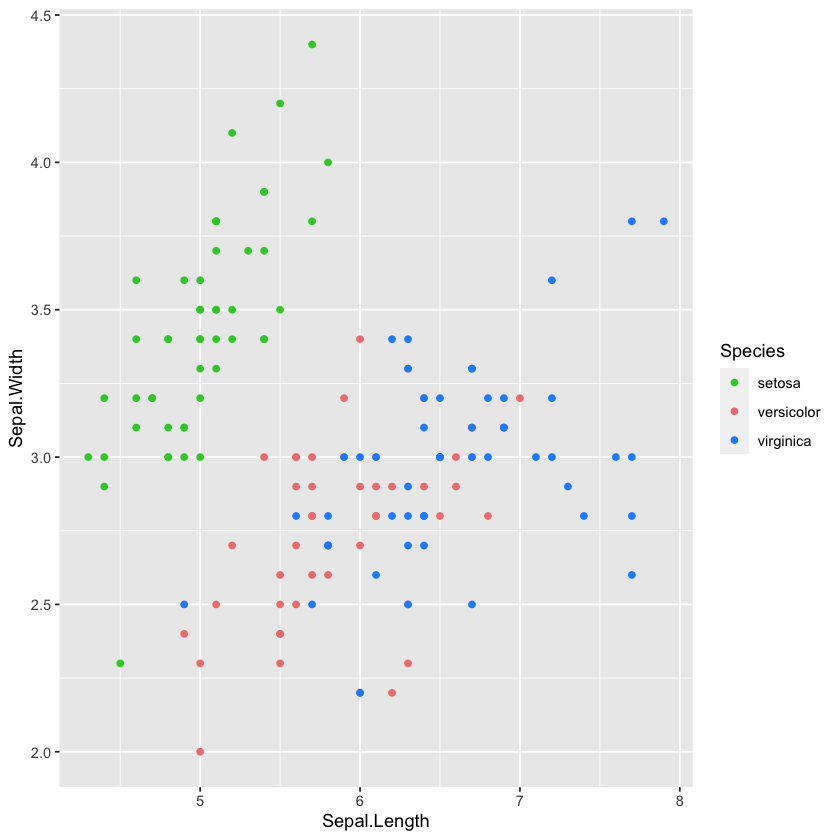

In [70]:
g <- ggplot(data = df, mapping = aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + # set up the variables to plot
    geom_point() +
    scale_color_manual(values = c('limegreen', 'lightcoral', 'dodgerblue'))
g

Finally, suppose we want to **change the order** of the species in our legend and/or change the colors that match each category. There are many options to do this (e.g., manually customize the legend labels, change the order of the specified colors). We will proceed with setting the Species column as an "ordered" categorical variable, as this allows the most flexibility and can be used in other plots without additional code. 

We can see that right now, the Species column is a string rather than a categorical variable:

In [71]:
typeof(df$Species)

[1] "character"

In [72]:
df$Species<-factor(x = df$Species, levels = c('versicolor', 'virginica', 'setosa')) # set the categories
sort(unique(df$Species))

[1] versicolor virginica  setosa    
Levels: versicolor virginica setosa

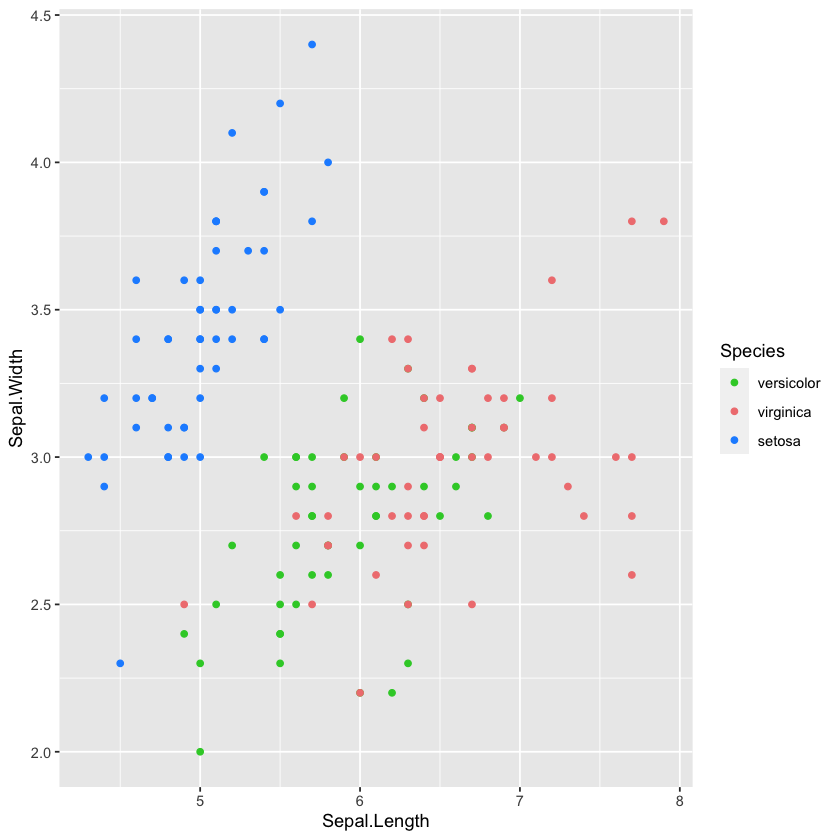

In [73]:
g <- ggplot(data = df, mapping = aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + # set up the variables to plot
    geom_point() +
    scale_color_manual(values = c('limegreen', 'lightcoral', 'dodgerblue'))
g

Now, suppose we wanted to visualize each species in a separate subplot instead. We can do this by faceting:

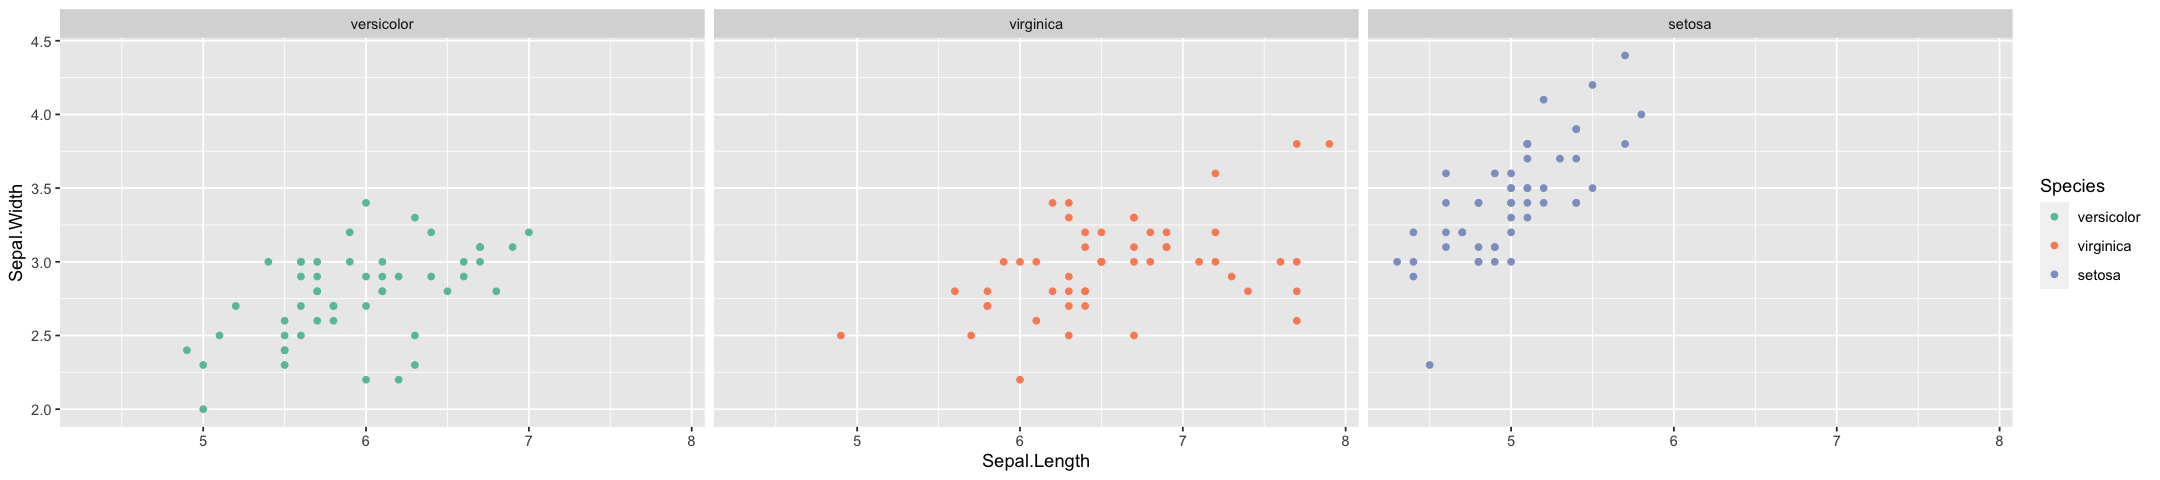

In [74]:
h_ = 4
w_ = 18
options(repr.plot.height=h_, repr.plot.width=w_) # set the figure dimensions

g <- ggplot(data = df, mapping = aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + # set up the variables to plot
    geom_point() +
    scale_color_brewer(palette = 'Set2')+facet_wrap(~Species)
g

Note that the order of the species categories is maintained from when we set it as a categorical variable.

## Overlaying multiple plot types

We can also visualize different plot types on the same figure. Suppose we want to also regress the sepal width on the sepal length. We can combine a regression and scatter plot on one figure. Note that scatterplots tend to be an optional argument within the regression plot arguments, but the same concept of overlaying plot types can be extended to other visualizations where that is not the case.

`geom_smooth()` using formula = 'y ~ x'


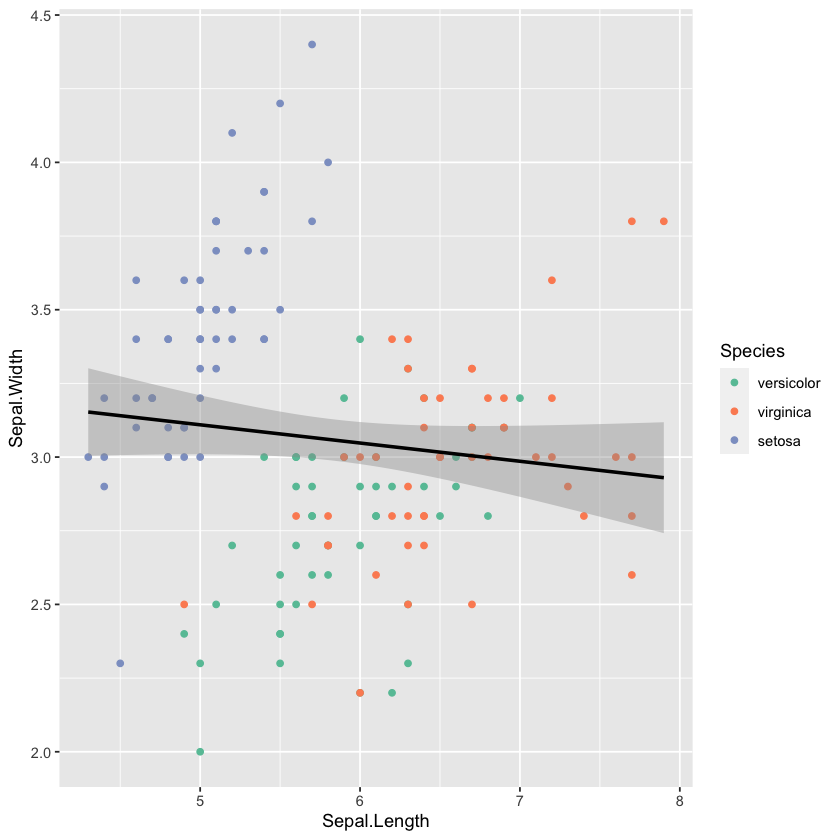

In [75]:
h_ = 7
w_ = 7
options(repr.plot.height=h_, repr.plot.width=w_) # set the figure dimensions

g <- ggplot(data = df, mapping = aes(x = Sepal.Length, y = Sepal.Width)) + # set up the variables to plot
    # we only want to color by species in the scatter plot, so we will specify it within the scatterplot function
    geom_point(aes(color = Species))+scale_color_brewer(palette = 'Set2')+
    geom_smooth(method='lm', color = 'black') # linear regression
g



We can also do the same thing, but on each categorical variable separately:

`geom_smooth()` using formula = 'y ~ x'


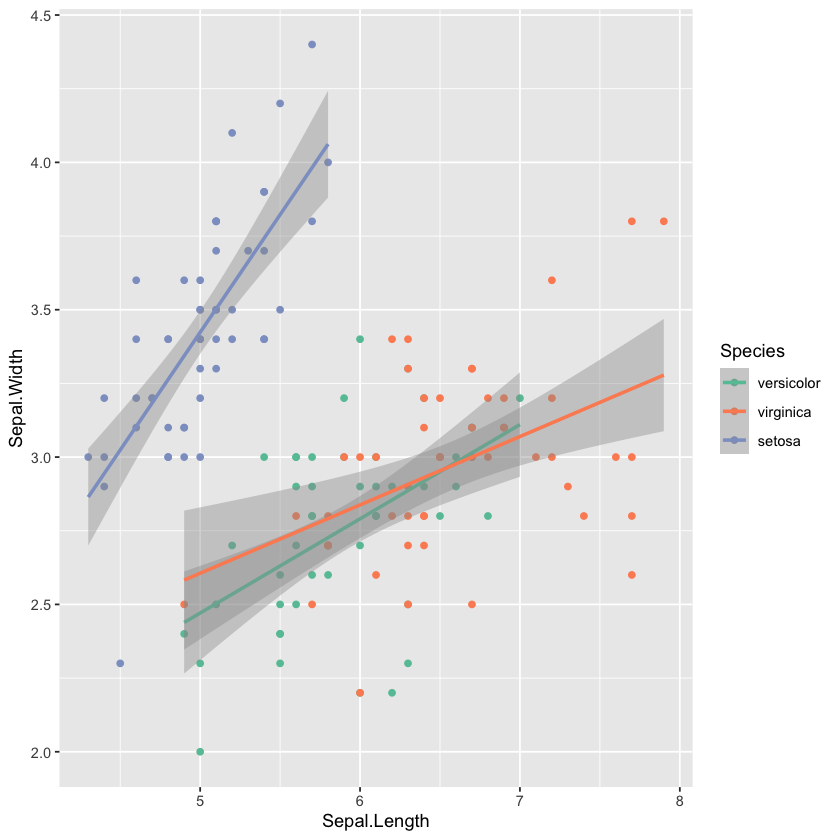

In [76]:
h_ = 7
w_ = 7
options(repr.plot.height=h_, repr.plot.width=w_) # set the figure dimensions

g <- ggplot(data = df, mapping = aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + # set up the variables to plot
    # specifying the color in the mapping will automatically apply it to both plot types
    geom_point(aes(color = Species))+
    geom_smooth(method='lm')+ # linear regression
    scale_color_brewer(palette = 'Set2')
g

## Manipulating Aesthetics

Many of the figure aesthetics can be manipulated by the guide() and theme(). 

### Customizing the Legend

Let's begin with our core scatter plot, but 1) place the legend on the top right of the figure, outside of the plot, 2) change the legend title to 'Category', 3) change the legend's text fonts, and 4) change the category labels to 'A', 'B', 'C':

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font d

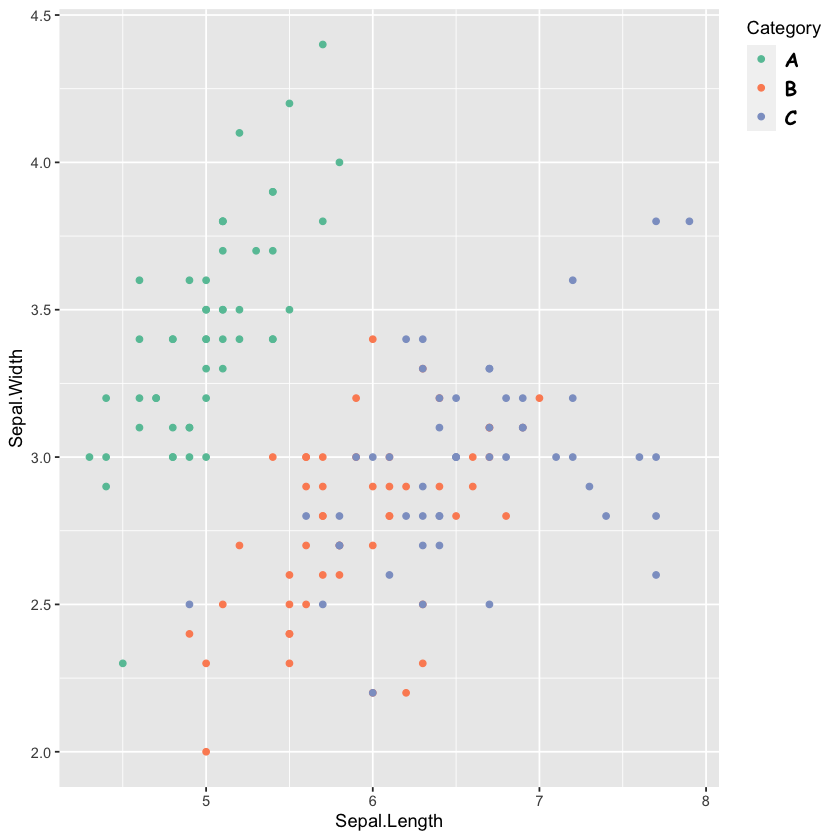

In [77]:
guide_ = guide_legend(label.theme = element_text(face = 'bold', size = 12, 
                                                 family = 'Comic Sans MS'),# change the fonts
                      title = 'Category' # change the title
                     )

g.legend <- g.main + # figure we previously created
scale_color_brewer(palette = 'Set2', # must respecify palette since this function overwrites original
                            labels = c('A', 'B', 'C'), # change the category labels
                           guide = guide_)+
theme(legend.justification = "top") # move the legend

g.legend

### Changing the theme

We can next define a theme that will 1) rotate the x axis tick labels, 2) add a figure title, 3) increase the font size of all the text on the plot and 4) remove the grey background. Defining a theme as its own variable is helpful for applying the same theme to multiple plots

In [78]:
theme_clean <- theme_classic() + # remove grey background
        theme(plot.title = element_text(hjust = 0.5), # add title
        text = element_text(size = 15), # increase font size
        axis.text.x = element_text(angle = 45), # rotate axis tick labels
        legend.position="right") 

Next, we can apply our theme to the plot from before, as well as change the title and axis labels.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comic Sans MS' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Comi

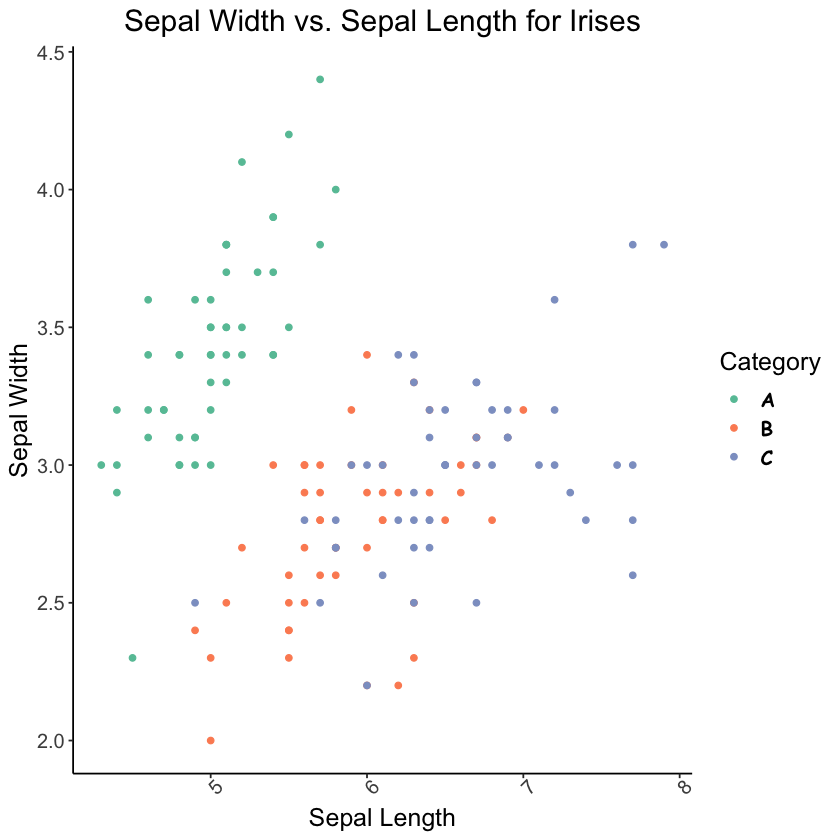

In [79]:

g.axis <- g.legend + # figure we previously created
    theme_clean + # add our theme
    labs(x = "Sepal Length", y = "Sepal Width", title = "Sepal Width vs. Sepal Length for Irises") # add labels
g.axis

# Challenge

Try emulating this plot as follows without installing additional packages to the environment:

1. Bin sepal width into 2 equal-interval bins -- transforming it into a discrete variable
2. Filter to exclude the setosa species
3. Visualize as a violin plot with some figure customizations

    a. Use the first three colors from the pallette 'BottleRocket1' from the R package wesanderson (hint: don't install package, just get the hex color codes, convert to RGBA for python, and manually set)
    
    
4. Annotate with a p-val non-parametric Mann-Whitney U between the two bins 
5. Annotate with a Cohen's d between bin2 vs bin1

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”


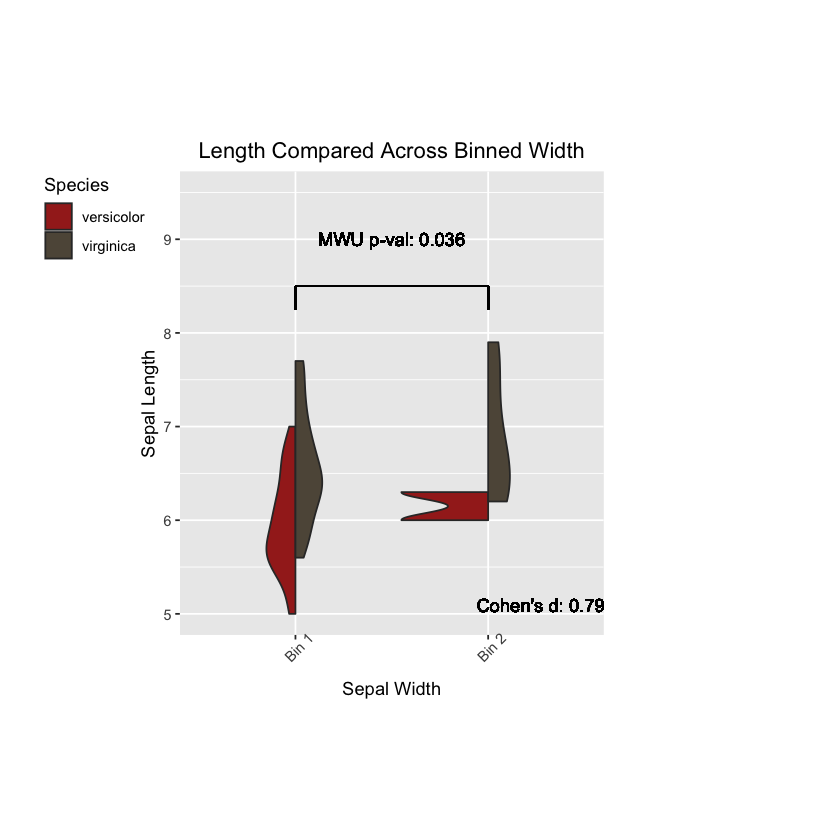

In [80]:
library(data.table, quietly = T)
df_viz = copy(df)

# step 1
n.bins = 2
df_viz[['Sepal.Width.Bins']]<-cut(df_viz$Sepal.Width, breaks = n.bins, labels = paste0('Bin ', 1:n.bins))

# step 2
df_viz = df_viz[df_viz$Species != 'setosa', ]
df_viz[['Species']]<-droplevels(df_viz$Species)

# step 3
# convert wes andrerson hex colors to rgb colors
hex_colors = c("#A42820", "#5F5647") # https://rdrr.io/cran/wesanderson/src/R/colors.R
# rgb_colors = [mcolors.to_rgba(c) for c in colors] #https://stackoverflow.com/questions/52652264/set-custom-seaborn-color-palette-using-hex-codes-and-name-the-colors

g<-ggplot(data = df_viz, aes(x = Sepal.Width.Bins, y = Sepal.Length, fill = Species))+
geom_split_violin()+ylab('Sepal Length') + xlab('Sepal Width') + 
ggtitle('Length Compared Across Binned Width')+theme(plot.title = element_text(hjust = 0.5))+
scale_fill_manual(values=hex_colors)+
theme(legend.position = c(-0.2,0.9), plot.margin=unit(c(3,5,3,3),"cm"))+
theme(axis.text.x = element_text(angle = 45))

# step4
bin1 = df_viz[df_viz$Sepal.Width.Bins == 'Bin 1', ][['Sepal.Length']]
bin2 = df_viz[df_viz$Sepal.Width.Bins == 'Bin 2', ][['Sepal.Length']]
p.val<-wilcox.test(x = bin1, y = bin2)$p.value

g<-g+ylim(5, 9.5)+
geom_text(x = 1.5, y = 9, label = paste0('MWU p-val: ', round(p.val, 3)))+
geom_segment(aes(x = 1, y = 8.5, xend = 2, yend = 8.5))+
geom_segment(aes(x = 1, y = 8.25, xend = 1, yend = 8.5))+
geom_segment(aes(x = 2, y = 8.25, xend = 2, yend = 8.5))


# step 5
cohens_d = -((mean(bin1) - mean(bin2)) / (sqrt((sd(bin1) ** 2 + sd(bin2) ** 2) / 2)))
g<-g+geom_text(x = 2.3, y = 5.1, label = paste0("Cohen's d: ", round(cohens_d, 3)))


g